In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1],color='black')

# What if Data is imabalanced

<pre>
1. As a part of this task we will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changes according to change in our learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

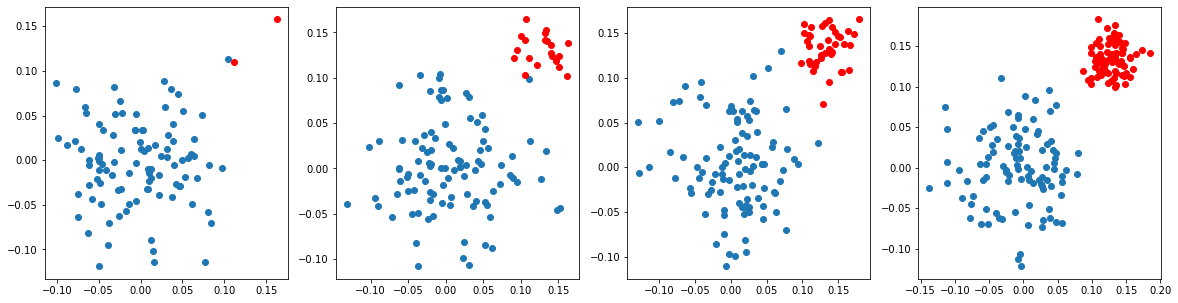

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

## Task 1: Applying SVM

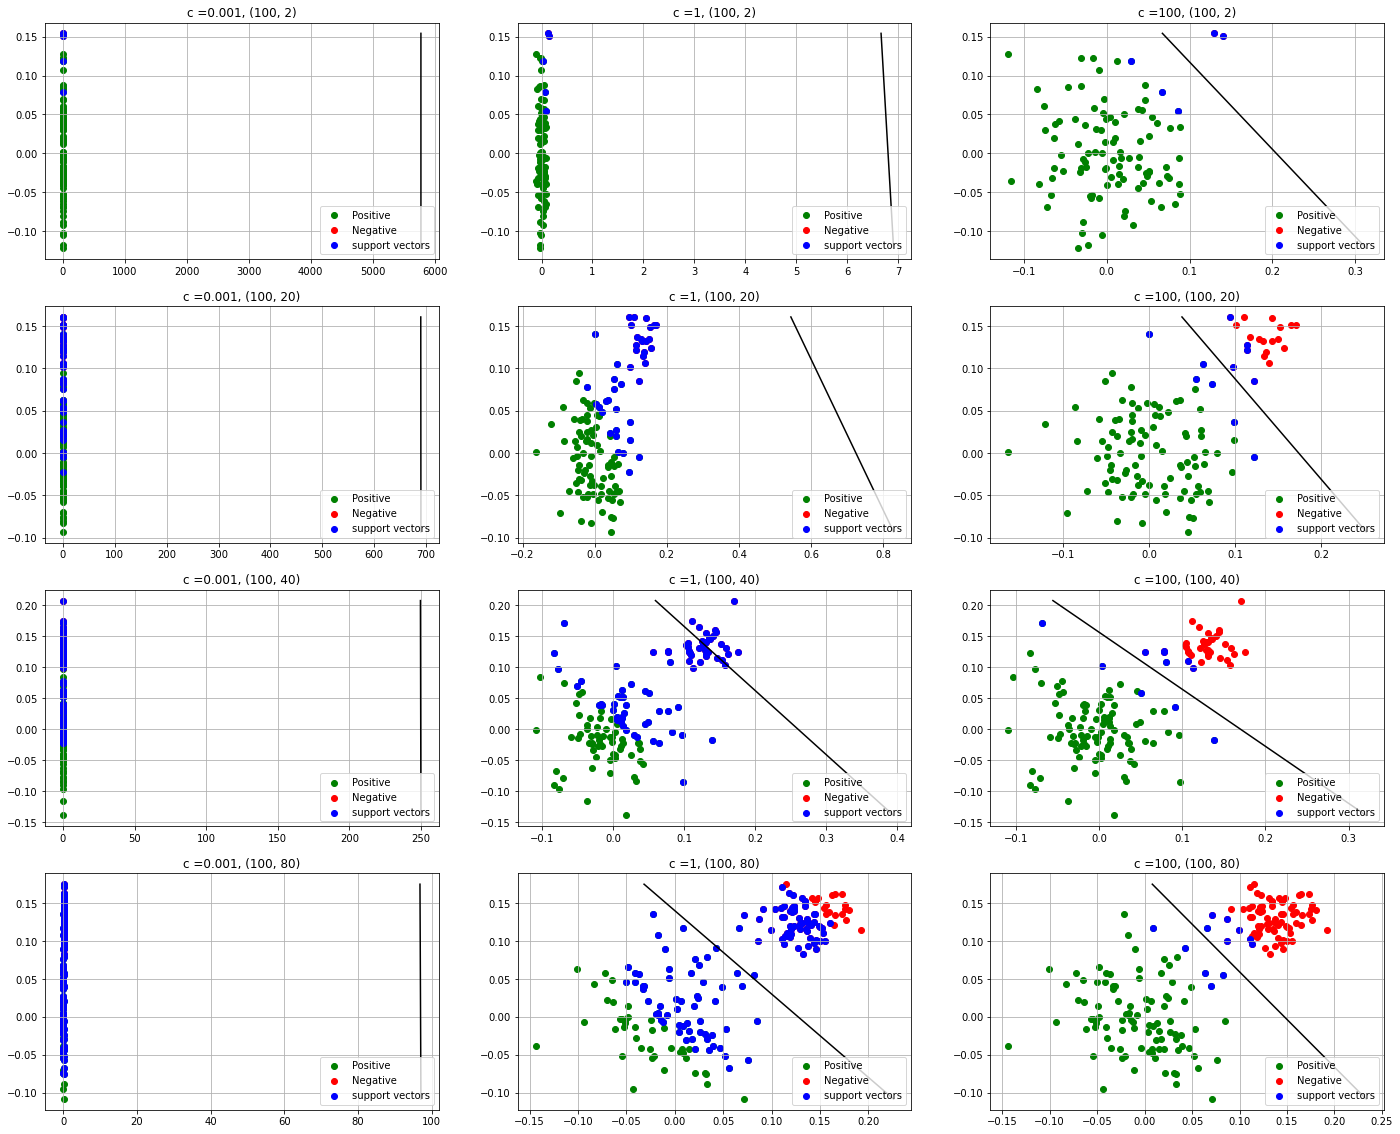

In [4]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(24,20))
c=[0.001, 1, 100]
k=0
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    for e in range(len(c)):
        
        clf= SVC(kernel="linear" , C=c[e])
        clf.fit(X,y)
        weight=clf.coef_
        intercept=clf.intercept_
        sv=clf.support_vectors_
        
        k=k+1
        plt.subplot(len(ratios),len(c),k)
        plt.title("c ={}, {}".format(c[e],i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1],color='green',label='Positive')
        plt.scatter(X_n[:,0],X_n[:,1],color='red' , label='Negative')
        plt.scatter(sv[:,0],sv[:,1],color="blue",label='support vectors')
        plt.legend(loc='lower right')
        mi=min(X[:,1])
        mx=max(X[:,1])
        draw_line(weight[0],intercept,mi,mx)
              
        
    
    

## Task 2: Applying LR

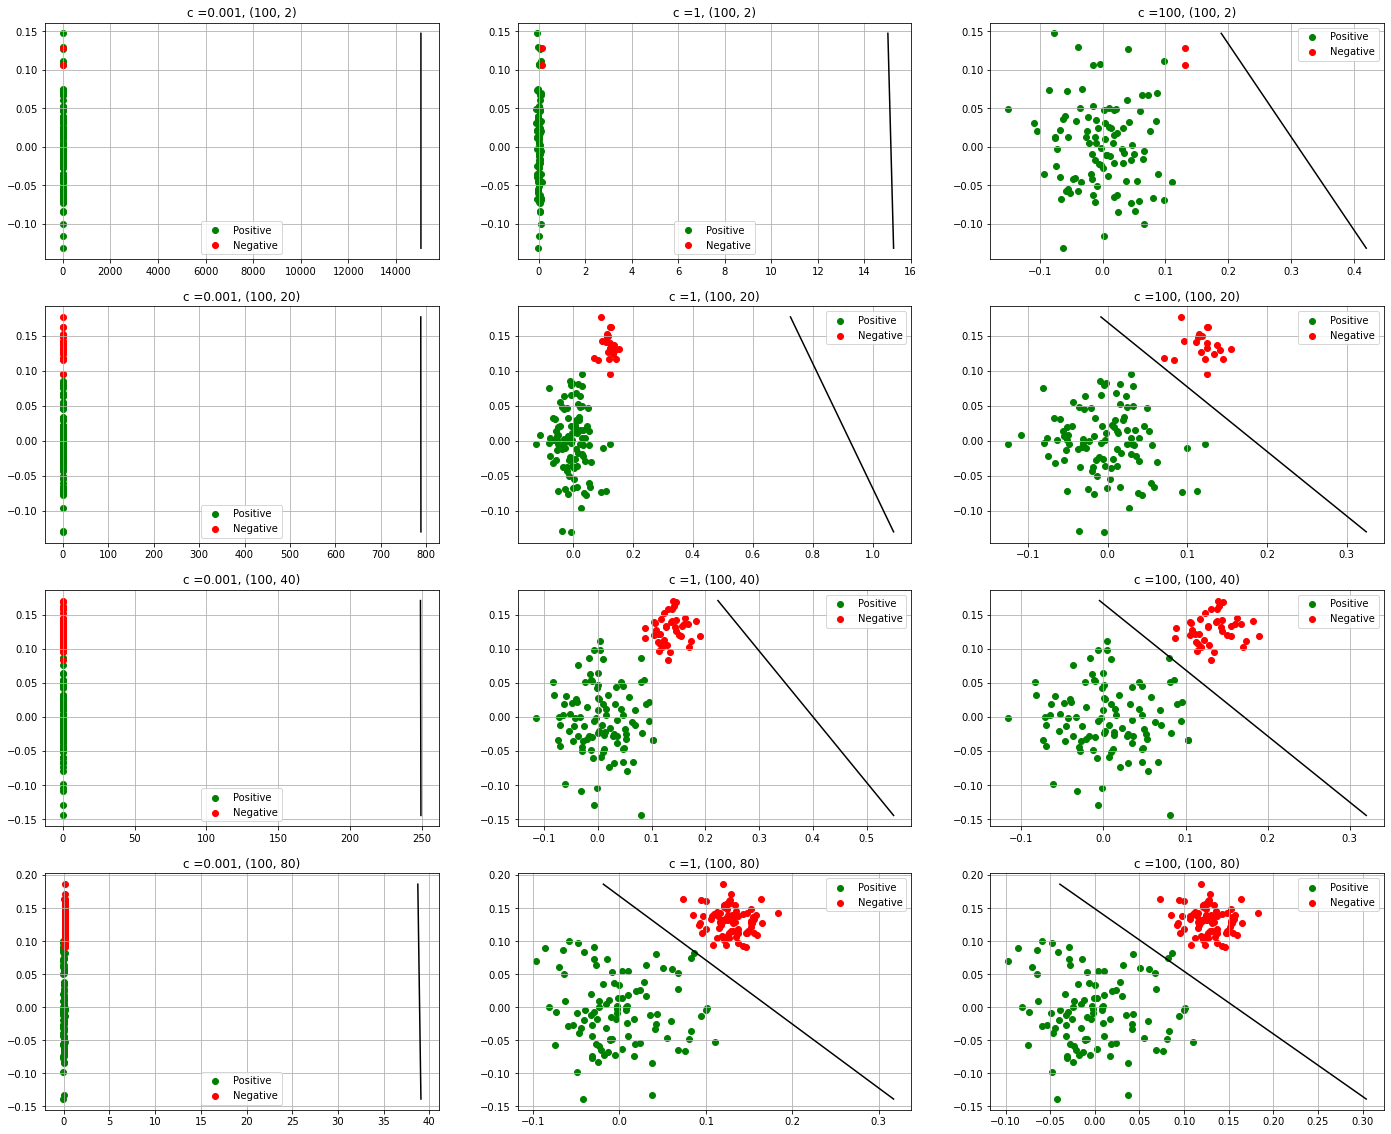

In [5]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(24,20))
c=[0.001, 1, 100]
k=0
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    for e in range(len(c)):
        
        clf= LogisticRegression(C=c[e])
        clf.fit(X,y)
        weight=clf.coef_
        intercept=clf.intercept_
        
        k=k+1
        plt.subplot(len(ratios),len(c),k)
        plt.title("c ={}, {}".format(c[e],i))
        plt.grid()
        plt.scatter(X_p[:,0],X_p[:,1],color='green' , label='Positive')
        plt.scatter(X_n[:,0],X_n[:,1],color='red' , label='Negative')
        plt.legend()
        mi=min(X[:,1])
        mx=max(X[:,1])
        draw_line(weight[0],intercept,mi,mx)
              

***Observations***
1. By plotting both the hyperplane of SVM and Logistic Regression we can able to understand that as C increases the model prediction is very high and when C is small the model is prediction is very low

2. So from the first point we can understand that C is the inverse of lambda and when C is small the regularization becomes stronger and it underfits and when C is large the regularization becomes weaker and it overfits 

3. As C increases it will work well in the training data and leads to overfit

4. Even for the imbalanced data also increased C works brilliant